In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from models import ALEXNET, VGGNET, LENET
from tensorflow.examples.tutorials.mnist import input_data

def show_result(images, labels, test_pred, i) :
    plt.imshow(images[i].reshape(28,28), interpolation='nearest')
    plt.axis('off')
    plt.show()

    target = np.argmax(labels[i])
    pred = np.argmax(test_pred[i])
    print("Target: " + str(target))
    print("Prediction: %d by %.2f percent" % (pred, (test_pred[i][pred])*100))

def test(model, sess, saver, test_data, function, difficulty, batch_size):
    """
    Tester
    """
    with tf.Session() as _sess:
        _sess.run(tf.local_variables_initializer())
        final_test_metric = 0
        for iter in range(10) :
            batch = test_data.next_batch(batch_size)
            images = [img.reshape(28,28,1) for img in batch[0]]
            labels = batch[1]
            test_metric, test_pred, test_pred_one = model.eval_metric(images, labels)
            final_test_metric = final_test_metric + test_metric
            for i in range(batch_size):
                if i == 0 or (np.argmax(labels[i]) != np.argmax(test_pred[i])):
                    show_result(images, labels, test_pred, i)
        print('Final test accuracy: %.2f percent' % (final_test_metric/10))

def run(model_name, function, difficulty, batch_size, learning_rate = 0.0025) :
    with tf.Session() as sess:
            # Define computation graph & Initialize
            print('Building network & initializing variables')
            if model_name == 'ALEXNET':
                model = ALEXNET(function, learning_rate, difficulty)
            elif model_name == 'VGGNET':
                model = VGGNET(function, learning_rate, difficulty)
            else:
                model = LENET(function, learning_rate, difficulty)

            model.init_sess(sess)
            saver = tf.train.Saver()

            # Process data
            print("Load dataset")
            dataset = input_data.read_data_sets('MNIST_data', one_hot=True)
            test_data = dataset.test


            print('Loading best checkpointed model')
            saver.restore(sess, "../"+model.model_filename)
            test(model, sess, saver, test_data, function, difficulty, batch_size)

Building network & initializing variables
Load dataset
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Loading best checkpointed model
INFO:tensorflow:Restoring parameters from ../model/LE_classify_hard.ckpt


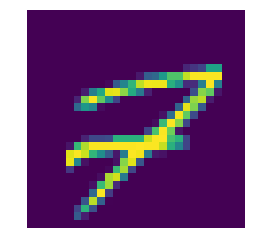

Target: 7
Prediction: 4 by 42.70 percent


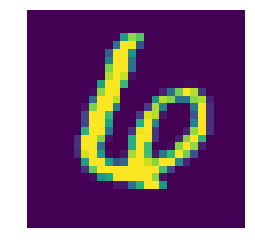

Target: 6
Prediction: 6 by 99.97 percent


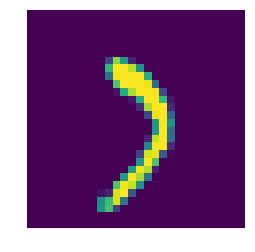

Target: 7
Prediction: 7 by 98.56 percent


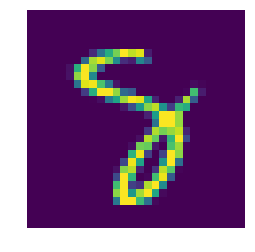

Target: 8
Prediction: 5 by 75.91 percent


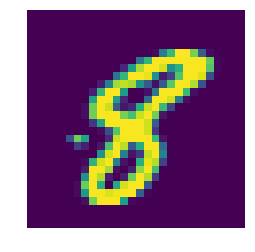

Target: 8
Prediction: 8 by 98.81 percent


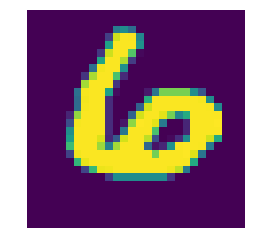

Target: 6
Prediction: 6 by 99.98 percent


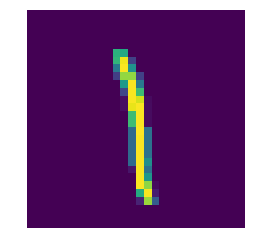

Target: 1
Prediction: 1 by 92.17 percent


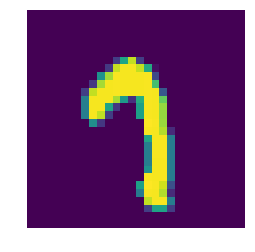

Target: 7
Prediction: 9 by 89.15 percent


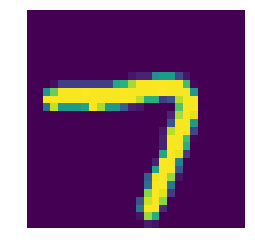

Target: 7
Prediction: 7 by 99.94 percent


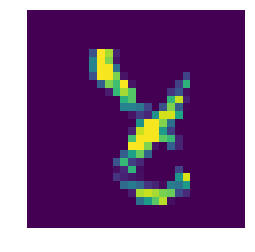

Target: 8
Prediction: 4 by 63.66 percent


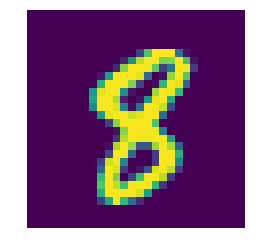

Target: 8
Prediction: 8 by 99.95 percent


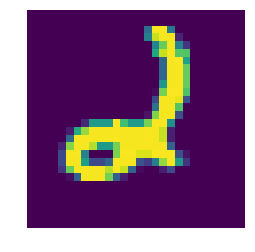

Target: 2
Prediction: 2 by 97.16 percent
Final test accuracy: 96.00 percent


In [2]:
run("LENET", "classify", "hard", 10)